<a href="https://colab.research.google.com/github/Darren7-pixel/Tugas-SIC/blob/main/202304560018_Darren_Renault_Emmanuele_Simauw_ProjectSIC_Recommendation_games_on_steam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = {
    'games': 'games.csv',
    'users': 'users.csv',
    'recommendations': 'recommendations.csv'
}
dataframes = {}

for name, path in file_paths.items():
    try:
        df_temp = pd.read_csv(path)
        dataframes[name] = df_temp
        print(f"Dataset '{path}' berhasil dimuat.")
        print(f"Dimensi dataset: {df_temp.shape[0]} baris, {df_temp.shape[1]} kolom\n")
    except FileNotFoundError:
        print(f"Error: File '{path}' tidak ditemukan.")
    except Exception as e:
        print(f"Error lain saat memuat dataset '{path}': {e}")

for name, df in dataframes.items():
    print(f"\n5 Baris pertama dari dataset '{name}':")
    pd.set_option('display.max_columns', None)
    print(df.head())

Dataset 'games.csv' berhasil dimuat.
Dimensi dataset: 50872 baris, 13 kolom

Dataset 'users.csv' berhasil dimuat.
Dimensi dataset: 14306064 baris, 3 kolom

Dataset 'recommendations.csv' berhasil dimuat.
Dimensi dataset: 41154794 baris, 8 kolom


5 Baris pertama dari dataset 'games':
   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            

In [2]:
for name, df in dataframes.items():
    print(f"\nInformasi Dasar Dataset '{name}' (df.info()):")
    df.info()


Informasi Dasar Dataset 'games' (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

Informasi Dasar Dataset 'users' (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143

In [3]:
for name, df in dataframes.items():
    print(f" Statistik Deskriptif Dataset '{name}'")

    # Statistik deskriptif untuk kolom numerik
    print("\nStatistik Deskriptif (Numerik):")
    print(df.describe().T)

    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("\nStatistik Deskriptif (Kategorikal/Object):")
        print(df[categorical_cols].describe().T)
    else:
        print("\nTidak ada kolom kategorikal di dataset ini.")

\ Statistik Deskriptif Dataset 'games'

Statistik Deskriptif (Numerik):
                  count          mean            std   min        25%  \
app_id          50872.0  1.055224e+06  610324.945457  10.0  528737.50   
positive_ratio  50872.0  7.705203e+01      18.253592   0.0      67.00   
user_reviews    50872.0  1.824425e+03   40073.521653  10.0      19.00   
price_final     50872.0  8.620325e+00      11.514164   0.0       0.99   
price_original  50872.0  8.726788e+00      11.507021   0.0       0.99   
discount        50872.0  5.592212e+00      18.606679   0.0       0.00   

                      50%         75%         max  
app_id          986085.00  1524895.00  2599300.00  
positive_ratio      81.00       91.00      100.00  
user_reviews        49.00      206.00  7494460.00  
price_final          4.99       10.99      299.99  
price_original       4.99       11.99      299.99  
discount             0.00        0.00       90.00  

Statistik Deskriptif (Kategorikal/Object):
        

In [4]:
for name, df in dataframes.items():
    print(f"\nPemeriksaan Nilai Hilang: Dataset '{name}'")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("Tidak ditemukan nilai hilang dalam dataset.")
    else:
        missing_percentage = (missing_values / len(df)) * 100
        missing_info = pd.DataFrame({
            'Jumlah Hilang': missing_values,
            'Persentase Hilang (%)': missing_percentage
        })
        missing_info = missing_info[missing_info['Jumlah Hilang'] > 0]
        print("Informasi Nilai Hilang per Kolom:")
        print(missing_info.sort_values(by='Persentase Hilang (%)', ascending=False))



Pemeriksaan Nilai Hilang: Dataset 'games'
Tidak ditemukan nilai hilang dalam dataset.

Pemeriksaan Nilai Hilang: Dataset 'users'
Tidak ditemukan nilai hilang dalam dataset.

Pemeriksaan Nilai Hilang: Dataset 'recommendations'
Tidak ditemukan nilai hilang dalam dataset.



Membuat histogram untuk fitur numerik'games'


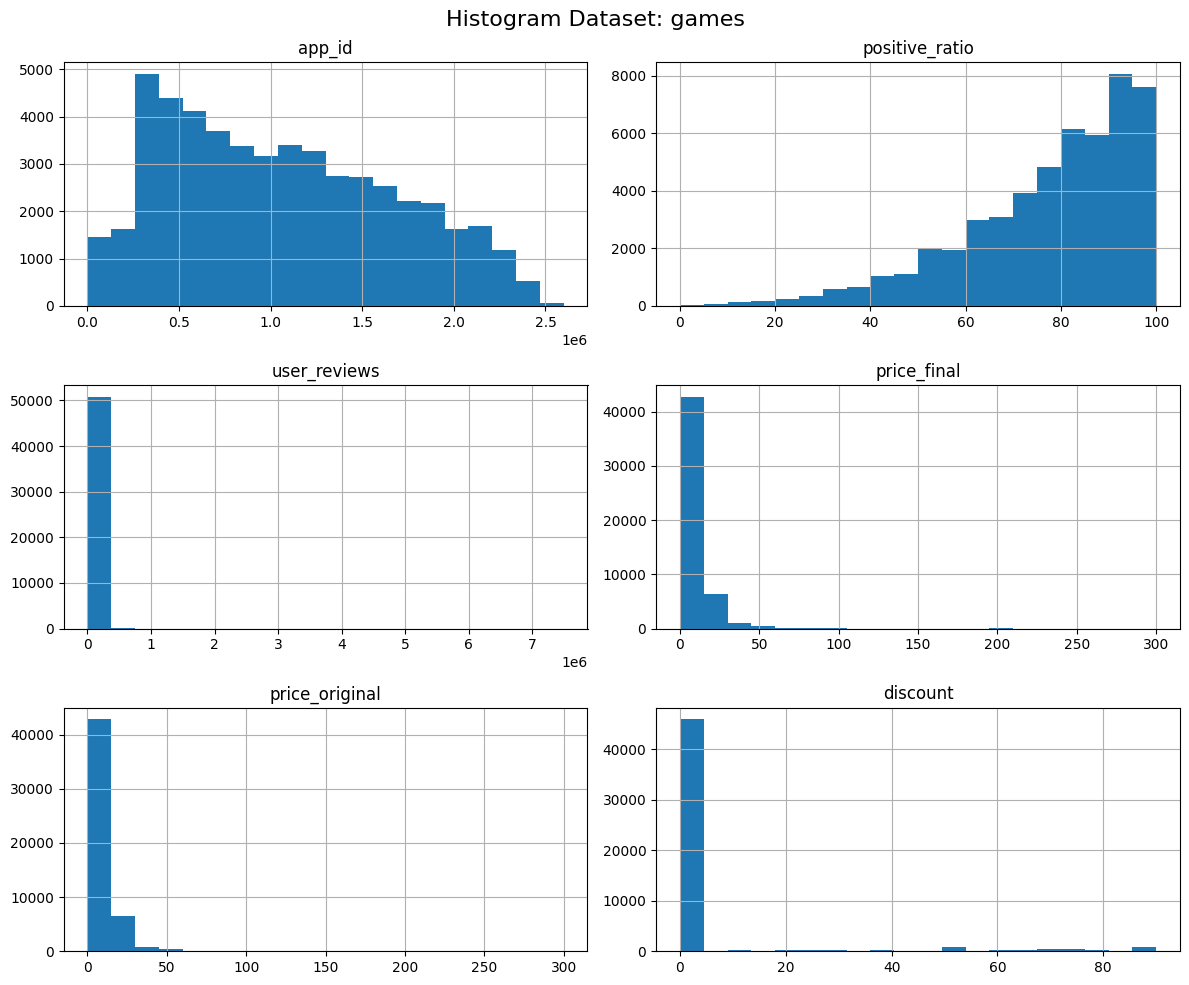


Membuat histogram untuk fitur numerik'users'


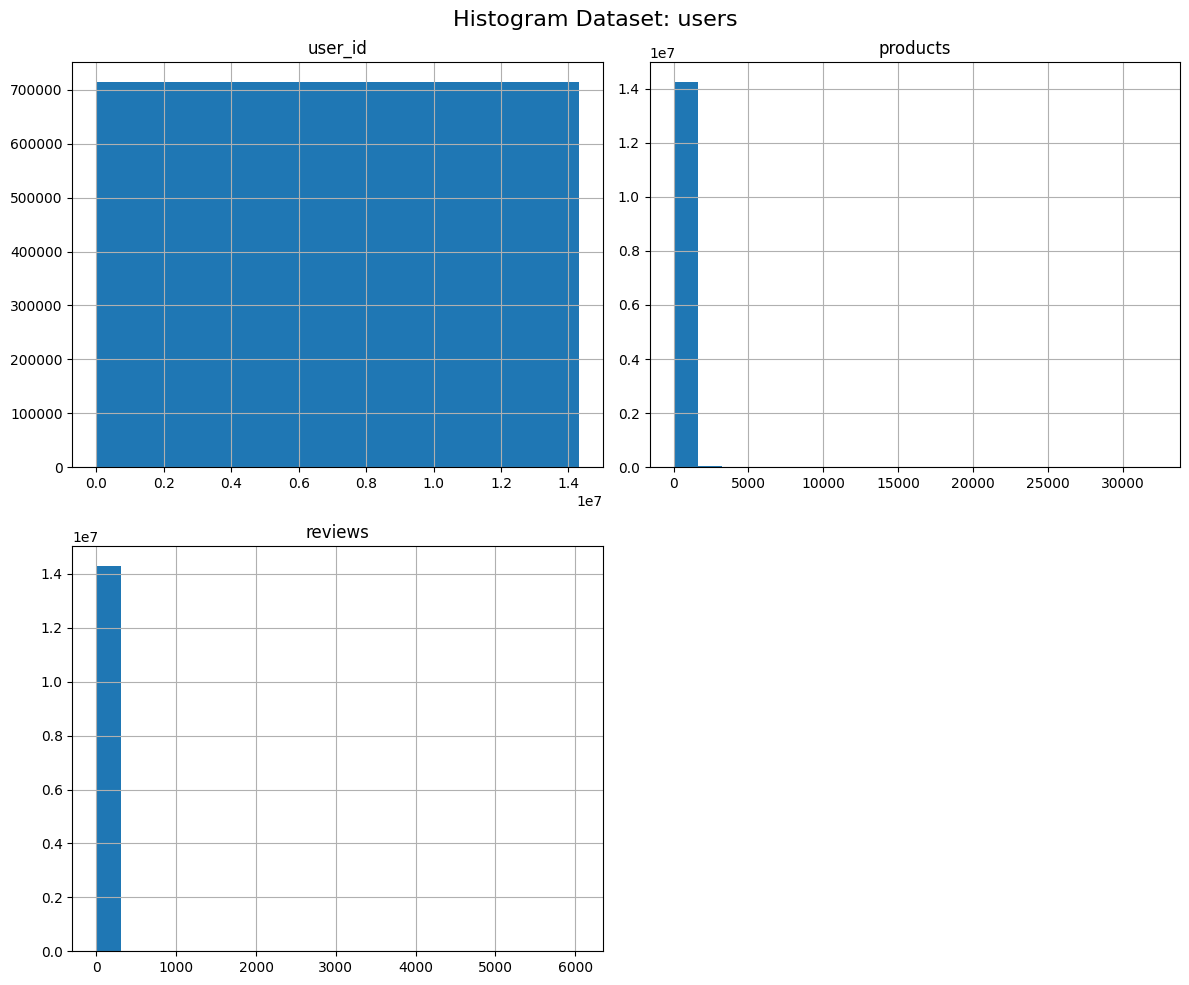


Membuat histogram untuk fitur numerik'recommendations'


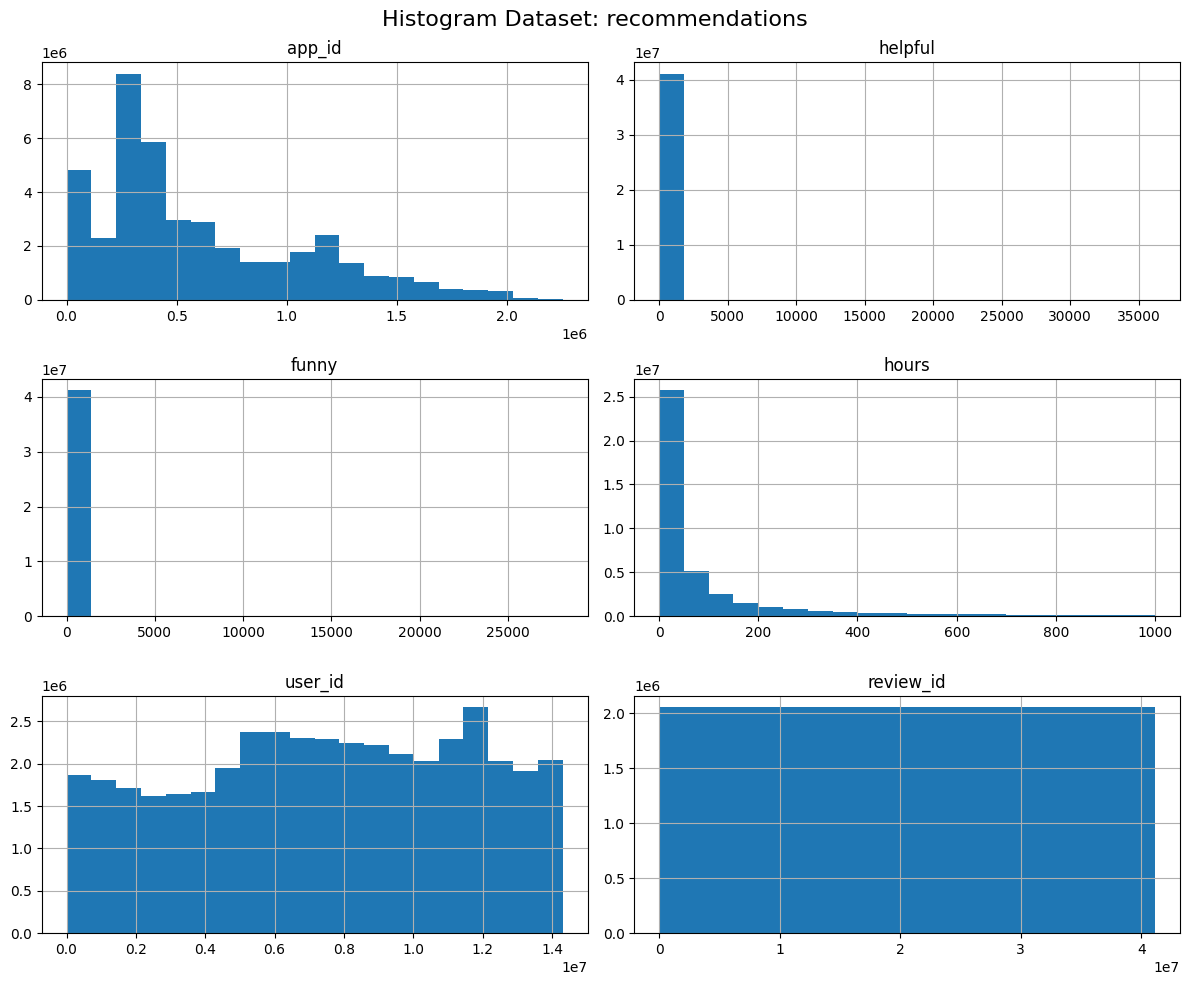

In [5]:
for name, df in dataframes.items():
    print(f"\nMembuat histogram untuk fitur numerik'{name}'")
    try:
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        if len(numeric_cols) > 0:
            df[numeric_cols].hist(figsize=(12, 10), bins=20)
            plt.suptitle(f'Histogram Dataset: {name}', fontsize=16)
            plt.tight_layout()
            plt.show()
        else:
            print("Tidak ada fitur numerik dalam dataset.")
    except Exception as e:
        print(f"Gagal membuat histogram: '{name}': {e}")


Countplot untu fitur kategorikal: 'games'


<ipython-input-6-fddd9c94715f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,order=top_categories, palette='viridis')


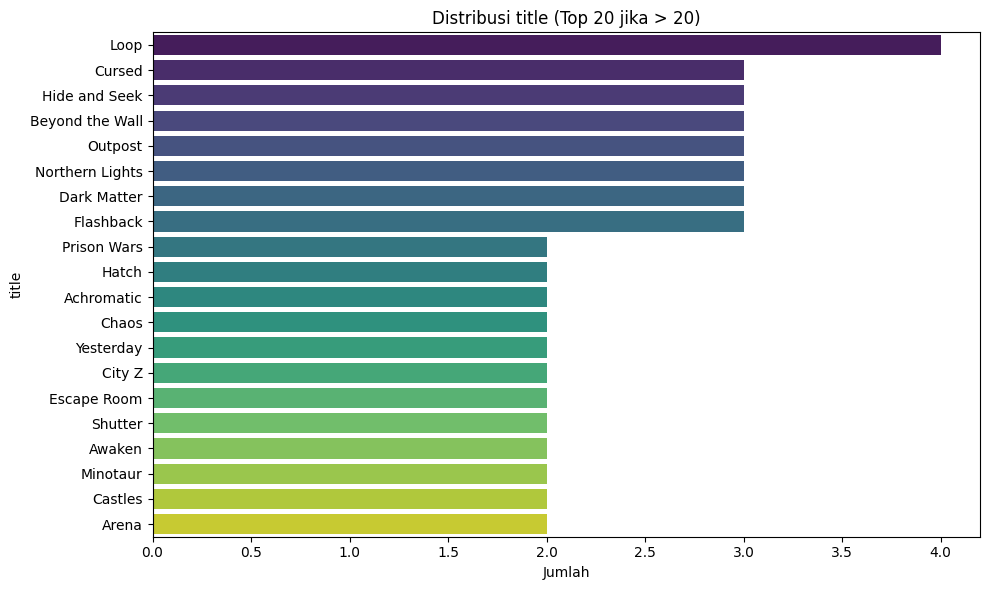

<ipython-input-6-fddd9c94715f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,order=top_categories, palette='viridis')


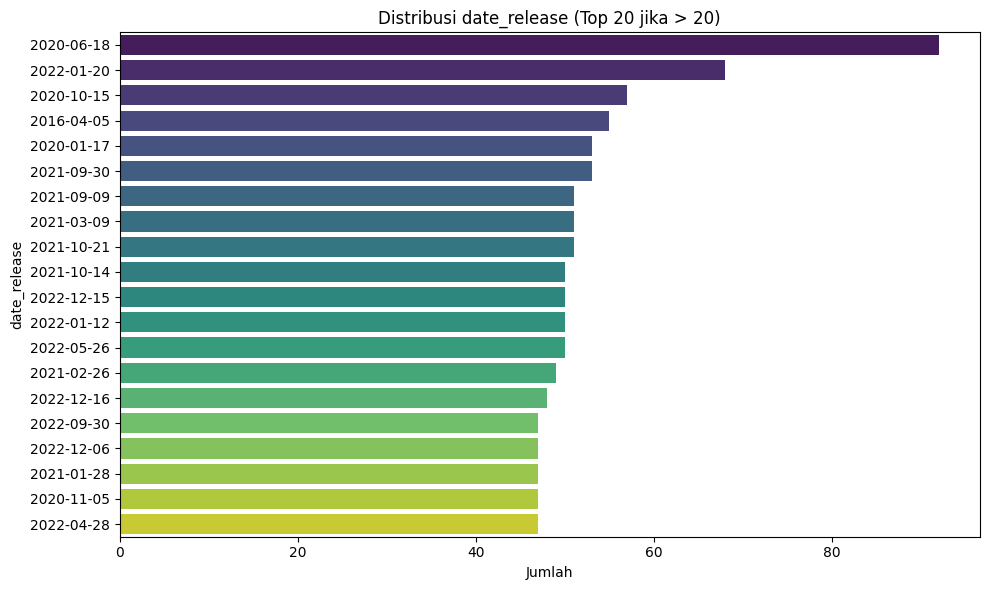

<ipython-input-6-fddd9c94715f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,order=top_categories, palette='viridis')


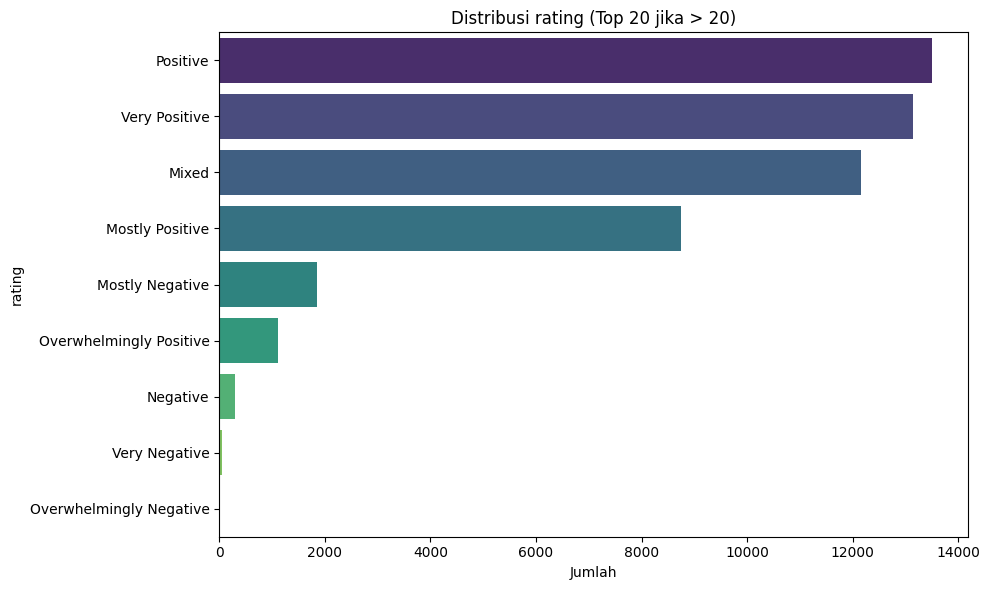


Countplot untu fitur kategorikal: 'users'

Countplot untu fitur kategorikal: 'recommendations'


<ipython-input-6-fddd9c94715f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df[column].isin(top_categories)], y=column,order=top_categories, palette='viridis')


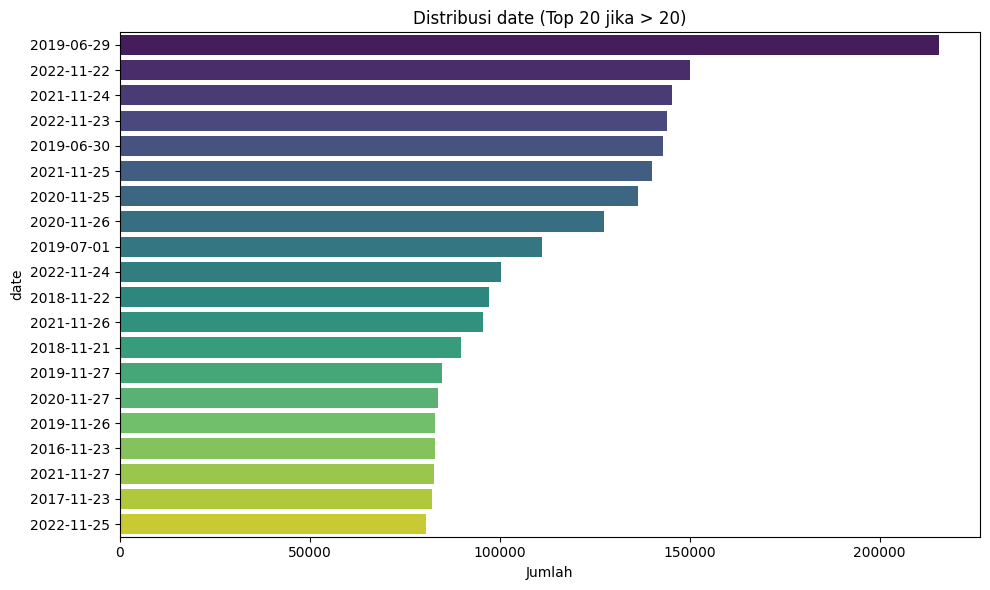

Dataset 'recommendations' tidak memiliki kolom kategorikal.


In [6]:
for name, df in dataframes.items():
    print(f"\nCountplot untu fitur kategorikal: '{name}'")
    categorical_cols = df.select_dtypes(include=['object']).columns

    for column in categorical_cols:
        try:
            plt.figure(figsize=(10, 6))
            top_categories = df[column].value_counts().nlargest(20).index
            sns.countplot(data=df[df[column].isin(top_categories)], y=column,order=top_categories, palette='viridis')
            plt.title(f'Distribusi {column} (Top 20 jika > 20)')
            plt.xlabel('Jumlah')
            plt.ylabel(column)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Gagal membuat countplot untuk {column} di dataset '{name}': {e}")
else:
      print(f"Dataset '{name}' tidak memiliki kolom kategorikal.")

\ nMembuat visualisasi hubungan dengan variabel target ...


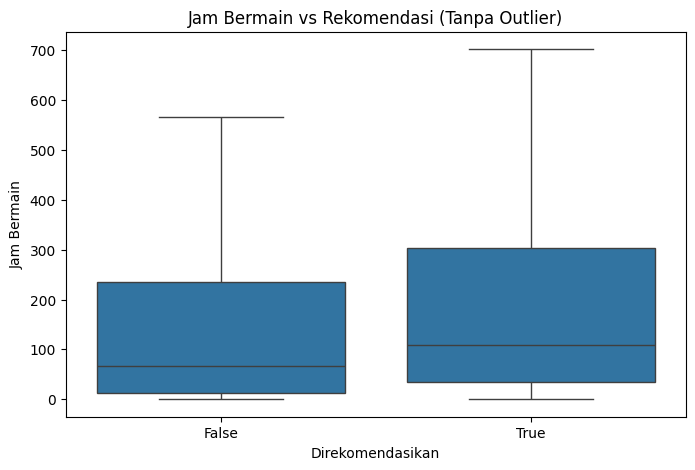

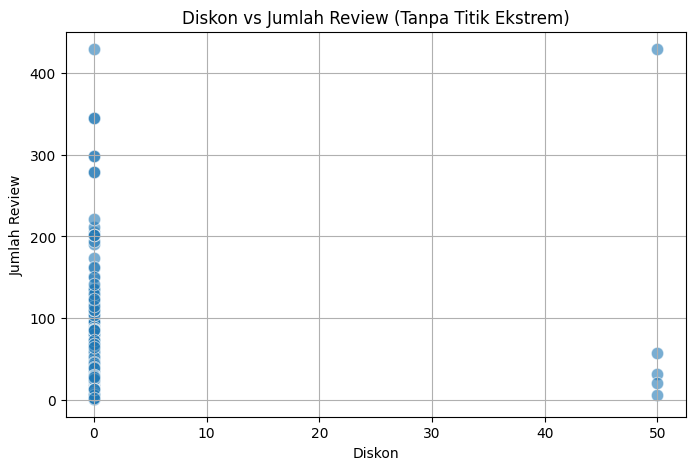

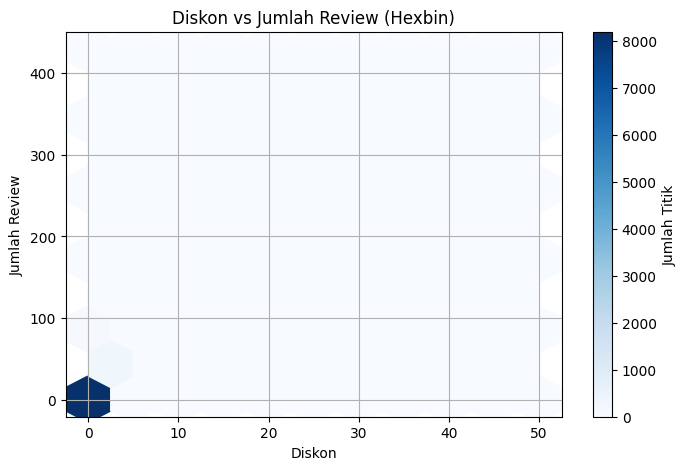

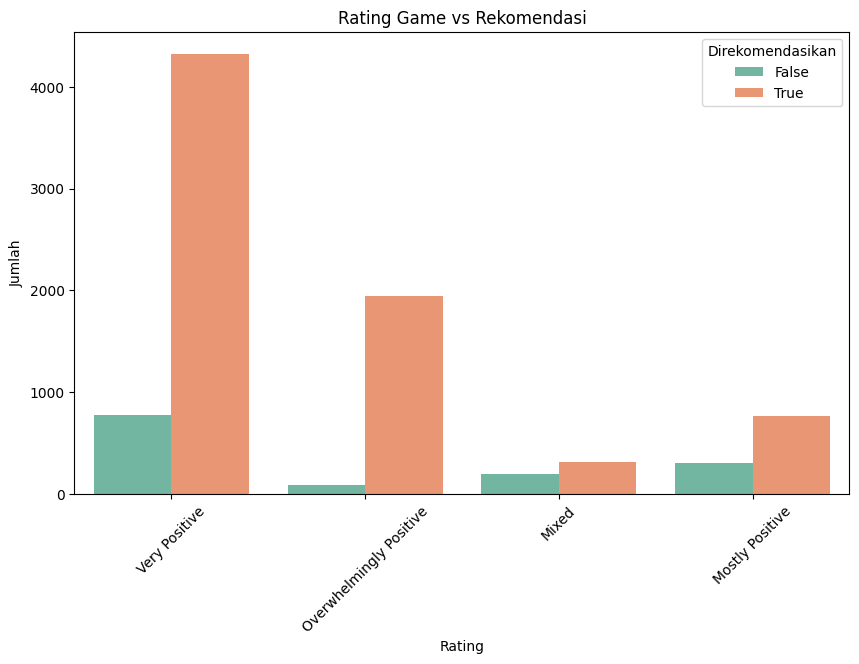

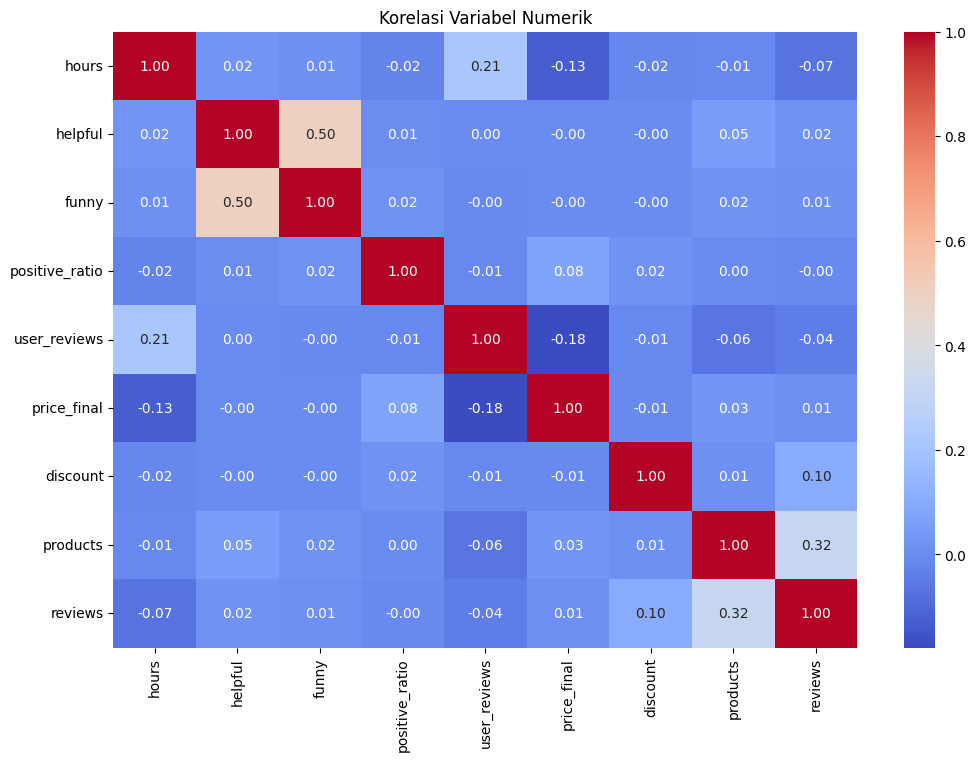

In [7]:
df_games = pd.read_csv('games.csv', nrows=350000)
df_recommendations = pd.read_csv('recommendations.csv', engine='python', nrows=350000)
df_users = pd.read_csv('users.csv', nrows=350000)
# Gabungkan data
df_merged = pd.merge(df_recommendations, df_games, on='app_id', how='inner')
df_merged = pd.merge(df_merged, df_users, on='user_id', how='inner')
# Ambil hanya 534188 baris pertama
df_merged = df_merged.head(350000)
print ("\ nMembuat visualisasi hubungan dengan variabel target ...")
# --- Boxplot tanpa outlier ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_merged, x='is_recommended', y='hours', showfliers=False)
plt.title('Jam Bermain vs Rekomendasi (Tanpa Outlier)')
plt.xlabel('Direkomendasikan')
plt.ylabel('Jam Bermain')
plt.show()

# --- Scatterplot dibatasi (tanpa titik ekstrem) ---
filtered_df = df_merged[(df_merged['discount'] <= 50) & (df_merged['reviews'] <= 500)]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='discount', y='reviews', s=80, alpha=0.6)
plt.title('Diskon vs Jumlah Review (Tanpa Titik Ekstrem)')
plt.xlabel('Diskon')
plt.ylabel('Jumlah Review')
plt.grid(True)
plt.show()
# --- Hexbin plot alternatif ---
plt.figure(figsize=(8, 5))
plt.hexbin(filtered_df['discount'], filtered_df['reviews'], gridsize=10, cmap='Blues')
plt.colorbar(label='Jumlah Titik')
plt.title('Diskon vs Jumlah Review (Hexbin)')
plt.xlabel('Diskon')
plt.ylabel('Jumlah Review')
plt.grid(True)
plt.show()
# --- Countplot: Rating Game vs Rekomendasi ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='rating', hue='is_recommended', palette='Set2')
plt.title('Rating Game vs Rekomendasi')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.legend(title='Direkomendasikan')
plt.show()
# --- Heatmap Korelasi ---
numerik = ['hours', 'helpful', 'funny', 'positive_ratio', 'user_reviews', 'price_final', 'discount', 'products', 'reviews']
plt.figure(figsize=(12, 8))
sns.heatmap(df_merged[numerik].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Variabel Numerik')
plt.show()

In [8]:
if df_recommendations is not None and 'hours' in df_recommendations.columns:
    df_recommendations['hours'] = pd.to_numeric(df_recommendations['hours'], errors='coerce')
    if df_recommendations['hours'].isnull().sum() > 0:
        print("Peringatan: Ada nilai non-numerik di 'hours', menghasilkan NaN.")
        median_hours = df_recommendations['hours'].median()
        df_recommendations['hours'].fillna(median_hours, inplace=True)
        print(f"NaN di 'hours' diimputasi dengan median: {median_hours}")
    else:
        print("Kolom 'hours' berhasil dikonversi ke numerik.")
    print(f"Tipe data baru 'hours': {df_recommendations['hours'].dtype}")
else:
    print("Dataset atau kolom 'hours' tidak ditemukan.")

# Dataset 2: GAMES
cols_to_convert_games = ['positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']
for col in cols_to_convert_games:
    if df_games is not None and col in df_games.columns:
        df_games[col] = pd.to_numeric(df_games[col], errors='coerce')
        if df_games[col].isnull().sum() > 0:
            print(f"Peringatan: Ada nilai non-numerik di '{col}', menghasilkan NaN.")
            median_val = df_games[col].median()
            df_games[col].fillna(median_val, inplace=True)
            print(f"NaN di '{col}' diimputasi dengan median: {median_val}")
        else:
            print(f"Kolom '{col}' berhasil dikonversi ke numerik.")
        print(f"Tipe data baru '{col}': {df_games[col].dtype}")
    else:
        print(f"Dataset atau kolom '{col}' tidak ditemukan.")

# Dataset 3: USERS
cols_to_convert_users = ['products', 'reviews']
for col in cols_to_convert_users:
    if df_users is not None and col in df_users.columns:
        df_users[col] = pd.to_numeric(df_users[col], errors='coerce')
        if df_users[col].isnull().sum() > 0:
            print(f"Peringatan: Ada nilai non-numerik di '{col}', menghasilkan NaN.")
            median_val = df_users[col].median()
            df_users[col].fillna(median_val, inplace=True)
            print(f"NaN di '{col}' diimputasi dengan median: {median_val}")
        else:
            print(f"Kolom '{col}' berhasil dikonversi ke numerik.")
        print(f"Tipe data baru '{col}': {df_users[col].dtype}")
    else:
        print(f"Dataset atau kolom '{col}' tidak ditemukan.")

Kolom 'hours' berhasil dikonversi ke numerik.
Tipe data baru 'hours': float64
Kolom 'positive_ratio' berhasil dikonversi ke numerik.
Tipe data baru 'positive_ratio': int64
Kolom 'user_reviews' berhasil dikonversi ke numerik.
Tipe data baru 'user_reviews': int64
Kolom 'price_final' berhasil dikonversi ke numerik.
Tipe data baru 'price_final': float64
Kolom 'price_original' berhasil dikonversi ke numerik.
Tipe data baru 'price_original': float64
Kolom 'discount' berhasil dikonversi ke numerik.
Tipe data baru 'discount': float64
Kolom 'products' berhasil dikonversi ke numerik.
Tipe data baru 'products': int64
Kolom 'reviews' berhasil dikonversi ke numerik.
Tipe data baru 'reviews': int64


In [11]:
from sklearn.preprocessing import LabelEncoder
if df is not None:
    print("\n--- Memulai Encoding Variabel Kategorikal ---")
    max_rows = 50
    if len(df) > max_rows:
        print(f"Dataset besar (> {max_rows} rows),{max_rows}")
        df = df.iloc[:max_rows]

    # Identifikasi kolom kategorikal
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Kolom yang ingin diabaikan
    ignore_cols = ['id', 'user_id', 'review_id', 'app_id']
    categorical_cols = [col for col in categorical_cols if col not in ignore_cols]

    # Batas kategori
    max_categories = 100
    low_card_cols = [col for col in categorical_cols if df[col].nunique() <= max_categories]
    high_card_cols = [col for col in categorical_cols if df[col].nunique() > max_categories]

    print(f"\nLow-cardinality columns (One-Hot Encoding): {low_card_cols}")
    print(f"High-cardinality columns (Label Encoding): {high_card_cols}")

    # Label Encoding untuk high-cardinality
    for col in high_card_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # One-Hot Encoding untuk low-cardinality
    if low_card_cols:
        df_encoded = pd.get_dummies(df, columns=low_card_cols, drop_first=True, dtype=int)
    else:
        df_encoded = df.copy()

    print(f"\nDimensi dataset setelah encoding: {df_encoded.shape}")
    print(df_encoded.head(10))

else:
    print("Dataframe 'df' tidak tersedia.")
    df_encoded = None



--- Memulai Encoding Variabel Kategorikal ---

Low-cardinality columns (One-Hot Encoding): ['date']
High-cardinality columns (Label Encoding): []

Dimensi dataset setelah encoding: (10, 16)
    app_id  helpful  funny  is_recommended  hours  user_id  review_id  \
0   975370        0      0            True   36.3    51580          0   
1   304390        4      0           False   11.5     2586          1   
2  1085660        2      0            True  336.5   253880          2   
3   703080        0      0            True   27.4   259432          3   
4   526870        0      0            True    7.9    23869          4   
5   306130        0      0            True    8.6    45425          5   
6   238960        0      0            True  538.8    88282          6   
7      730        0      0           False  157.5    63209          7   
8   255710        0      0            True   18.7   354512          8   
9   289070        0      0            True  397.5   454422          9   

   da

In [19]:
from sklearn.preprocessing import MinMaxScaler

# --- Mulai Scaling ---
if 'df_encoded' in locals() and df_encoded is not None:
    print("\n--- Memulai Scaling Fitur Numerik ---")
    # Daftar fitur numerik yang ingin di-scale (ubah sesuai nama sebenarnya di df_encoded)
    original_numerical_cols = {
        'helpful', 'funny', 'hours',  # dari recommendations
        'games_positive_ratio', 'games_user_reviews', 'games_price_final',
        'games_price_original', 'games_discount',  # dari games
        'users_products', 'users_reviews'  # dari users
    }
    # Filter kolom yang benar-benar ada di df_encoded
    numerical_features_to_scale = [col for col in original_numerical_cols if col in df_encoded.columns]
    if numerical_features_to_scale:
        print(f"\nFitur numerik yang akan di-scale: {numerical_features_to_scale}")
        # Salin dataframe
        df_scaled = df_encoded.copy()
        # Scaling
        scaler = MinMaxScaler()
        df_scaled[numerical_features_to_scale] = scaler.fit_transform(df_scaled[numerical_features_to_scale])
        # Tampilkan hasil scaling
        print("\nContoh data setelah normalisasi (fitur numerik yang di-scale):")
        print(df_scaled[numerical_features_to_scale].head())

        print("\nStatistik deskriptif setelah scaling (cek min/max):")
        print(df_scaled[numerical_features_to_scale].describe().T)

    else:
        print("Tidak ada fitur numerik dari daftar yang ditemukan di df_encoded.")
        df_scaled = df_encoded.copy()

else:
    print("Dataframe 'df_encoded' tidak tersedia.")
    df_scaled = None


--- Memulai Scaling Fitur Numerik ---

Fitur numerik yang akan di-scale: ['hours', 'funny', 'helpful']

Contoh data setelah normalisasi (fitur numerik yang di-scale):
      hours  funny  helpful
0  0.053494    0.0      0.0
1  0.006781    0.0      1.0
2  0.618949    0.0      0.5
3  0.036730    0.0      0.0
4  0.000000    0.0      0.0

Statistik deskriptif setelah scaling (cek min/max):
         count      mean       std  min       25%       50%       75%  max
hours     10.0  0.275325  0.372330  0.0  0.010171  0.045112  0.534658  1.0
funny     10.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
helpful   10.0  0.150000  0.337474  0.0  0.000000  0.000000  0.000000  1.0


In [26]:
from sklearn.model_selection import train_test_split

# Misal 'df_final' adalah dataframe hasil gabungan ketiga dataset
if 'df_merged' in locals() and df_merged is not None and 'is_recommended' in df_merged.columns:
    print("\n--- Memulai Pembagian Dataset (Train - Test Split) ---")
    target_column = 'is_recommended'
    X = df_merged.drop(target_column, axis=1)
    y = df_merged[target_column]
    print(f"Ukuran Fitur (X) sebelum split: {X.shape}")
    print(f"Ukuran Target (y) sebelum split: {y.shape}")
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.2,
            random_state=42,
            stratify=y
        )
        print("\nUkuran dataset setelah dibagi:")
        print(f"X_train shape: {X_train.shape}")
        print(f"X_test shape: {X_test.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"y_test shape: {y_test.shape}")
        print("\nProporsi target di y_train:")
        print(y_train.value_counts(normalize=True).map('{:.2%}'.format))
        print("\nProporsi target di y_test:")
        print(y_test.value_counts(normalize=True).map('{:.2%}'.format))
    except Exception as e:
        print(f"\nError saat membagi dataset: {e}")


--- Memulai Pembagian Dataset (Train - Test Split) ---
Ukuran Fitur (X) sebelum split: (8719, 21)
Ukuran Target (y) sebelum split: (8719,)

Ukuran dataset setelah dibagi:
X_train shape: (6975, 21)
X_test shape: (1744, 21)
y_train shape: (6975,)
y_test shape: (1744,)

Proporsi target di y_train:
is_recommended
True     84.33%
False    15.67%
Name: proportion, dtype: object

Proporsi target di y_test:
is_recommended
True     84.35%
False    15.65%
Name: proportion, dtype: object

Dataset siap untuk tahap pemodelan!


1. Ringkasan Temuan:
Dataset yang digunakan melibatkan tiga catatan terkait: games, users, dan recommendations. Data mencakup informasi aplikasi, harga, dan produk pengguna. Kolom numerik seperti hours, positive_ratio, dan reviews memiliki nilai non-numerik yang perlu dibersihkan dan diimputasi menggunakan median. Kolom kategorikal, seperti rating dan is_recommended, dianalisis dengan visualisasi distribusinya. Meskipun ada nilai hilang, masalah tersebut dapat ditangani tanpa mengubah distribusi data secara signifikan.

2. Ringkasan Persiapan:
Selama persiapan data, kolom numerik yang mengandung nilai non-numerik dikonversi menjadi numerik dan nilai hilang diimputasi dengan median. Kolom kategorikal diproses menggunakan teknik pengkodean yang sesuai, dan fitur numerik di-normalisasi dengan MinMaxScaler untuk memastikan konsistensi skala. Data akhirnya digabungkan dan dibagi menjadi dataset pelatihan dan pengujian (80:20) menggunakan stratified split untuk mempertahankan distribusi target yang seimbang.

3. Refleksi dan Masalah:
Tantangan utama adalah menangani nilai non-numerik dalam kolom numerik dan menangani kolom kategorikal dengan banyak kategori. Solusi yang diterapkan adalah konversi tipe data dan imputasi nilai hilang menggunakan median. Selain itu, pembagian data dengan stratified split memastikan distribusi target yang seimbang, penting untuk model yang bekerja dengan data yang tidak seimbang.

